# Best response polytopes

Another useful representation of games is to consider polytopes. A polytope $\mathcal{P}$ has the following definition:

---
## Definition of a Polytope as a convex hull

[Video](https://www.youtube.com/watch?v=6NaPQhJe2QM&list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb&index=20)

For a given set of vertices $V\subseteq\mathbb{R} ^ K$, a Polytope $\mathcal{P}$ can be defined as the following set of points:

$$
\mathcal{P} = \left\{\sum_{i=1}^{|V|} \lambda_i v_i \in\mathbb{R} ^ K \;\left|\; \sum_{i=1}^{|V|} \lambda_i = 1; \lambda_i\geq 0;v_i \in V \right.\right\}
$$

---

This is a higher dimensional generalization of polygons. Let us plot the polytope with vertices:

$$
V = \{(0, 0), (1/2, 0), (1/2, 1/4), (0, 1/3)\}
$$

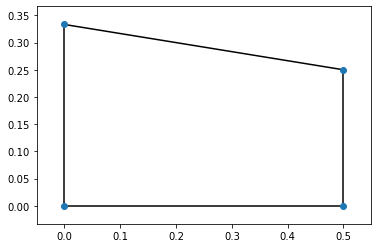

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

V = [
    np.array([0, 0]), 
    np.array([1 / 2, 0]), 
    np.array([1 / 2, 1 / 4]), 
    np.array([0, 1 / 3])
]
P = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(P);


An equivalent definition of Polytope is as an intersection of boundaries that seperate the space in to two distinct areas.

---

## Definition of a Polytope as an intersection of halfspaces

[Video](https://youtu.be/_JJ2O6q_pEg?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

For a matrix $M\in\mathbb{R} ^ {m\times n}$ and a vector $b\in\mathbb{R}^m$ a Polytope $\mathcal{P}$ can be defined as the following set of points:

$$
\mathcal{P} = \left\{x \in\mathbb{R} ^ {n} \;\left|\; Mx\leq b \right.\right\}
$$

---

For example the previous polytope is equivalently described by the following inequalities:

$$
\begin{aligned}
- x_1       & \leq 0\\
-x_2        & \leq 0\\
2x_1        & \leq 1\\
3x_2        & \leq 1\\
x_1 + 6 x_2 & \leq 2
\end{aligned}
$$

---

## Definition of best response polytopes

[Video](https://youtu.be/yGGtYMpSSzY?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)


For a two player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the row/column player best response polytope $\mathcal{P}$/$\mathcal{Q}$ is defined by:

$$
\mathcal{P} = \left\{x\in\mathbb{R}^{m}\;|\;x\geq 0; xB\leq 1\right\}
$$

$$
\mathcal{Q} = \left\{y\in\mathbb{R}^{n}\;|\; Ay\leq 1; y\geq 0 \right\}
$$

---

The polytope $\mathcal{P}$, corresponds to the set of points with an upper bound on the utility of those points when considered as row strategies against which the column player plays.

The fact that these polytopes are defined for $A, B > 0$ is not restrictive as we can simply add a constant to our utilities. As an example, let us consider the matching pennies game:

$$
A = 
\begin{pmatrix}
    1 & -1\\
    -1&  1
\end{pmatrix}\qquad
B = 
\begin{pmatrix}
    -1 & 1\\
    1&  -1
\end{pmatrix}
$$

First let us add 2 to all utilities:

$$
A = 
\begin{pmatrix}
    3 & 1\\
    1 &  3
\end{pmatrix}\qquad
B = 
\begin{pmatrix}
    1 & 3\\
    3 &  1
\end{pmatrix}
$$

The inequalities for $\mathcal{P}$ are then given by:

$$
\begin{aligned}
-x_1        & \leq 0\\
-x_2        & \leq 0\\
x_1 + 3 x_2        & \leq 1\\
3 x_1 + x_2       & \leq 1\\
\end{aligned}
$$

which corresponds to:

$$
\begin{aligned}
x_1        & \geq 0\\
x_2        & \geq 0\\
x_2        & \leq 1/3 -x_1/3\\
x_2       & \leq 1 - 3x_1\\
\end{aligned}
$$

the intersection of the two non trivial constraints is at the point:

$$1/3 -x_1/3=1 - 3x_1$$

giving:

$$x_1=1/4$$ 

and

$$x_2=1/4$$

In [5]:
import sympy as sym
x_1 = sym.symbols('x_1')
sym.solveset(1/3 - x_1 / 3 - 1 + 3 * x_1, x_1)

FiniteSet(0.25)

This gives 4 vertices:

$$
V = \{(0, 0), (1/3, 0), (1/4, 1/4), (0, 1/3)\}
$$

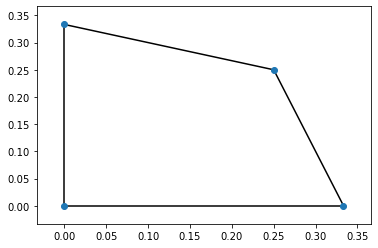

In [6]:
V = [
    np.array([0, 0]), 
    np.array([1 / 3, 0]), 
    np.array([1 / 4, 1 / 4]), 
    np.array([0, 1 / 3])
]
P = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(P);

## Vertex labelling

[Video](https://youtu.be/yeatZdnfFY4?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

These vertices are no longer probability vectors. Recall the four inequalities of this polytope:

1. $x_1 \geq 0$: if this inequality is "binding" (ie $x_1=0$) that implies that the row player does not play that strategy.
2. $x_2 \geq 0$: if this inequality is "binding" (ie $x_2=0$) that implies that the row player does not play that strategy.
3. $x_1 + 3 x_2 \leq 1$: if this inequality is binding (ie $x_1 + 3 x_2 = 1$) then that implies that the utility to the column player for that particular column is as big as it can be.
4. $3x_1 + x_2 \leq 1$: if this inequality is binding (ie $3x_1 + x_2 = 1$) then that implies that the utility to the column player for that particular column is as big as it can be.

We in fact use this notion to **label** our vertices:

1. $(0, 0)$ has labels $\{0, 1\}$ (we start our indexing at 0).
2. $(1/3, 0)$ has labels $\{1, 3\}$
3. $(1/4, 1/4)$ has labels $\{2, 3\}$
4. $(0, 1/3)$ has labels $\{0, 2\}$

Similarly the vertices and labels for $\mathcal{Q}$ are:

1. $(0, 0)$ has labels $\{2, 3\}$
2. $(1/3, 0)$ has labels $\{0, 3\}$
3. $(1/4, 1/4)$ has labels $\{0, 1\}$
4. $(0, 1/3)$ has labels $\{1, 2\}$

Note that for a given pair of vertices, if the pair is fully labeled (so that the union of the labels is $\{0, 1, 2, 3\}$) then either a strategy is not played or it is a best response to the other player's strategies.

This leads to a final observation:

---
## Fully labeled vertex pair

For a pair of vertices $(x, y)\in\mathcal{P}\times \mathcal{Q}$, if the union of the labels of $x$ and $y$ correspond to the set of all labels then $x, y$, when normalised (so that the sum is 1), correspond to a Nash equilibrum.

---

This leads to another algorithm for finding equilibria:

---
## Vertex enumeration algorithm

[Video](https://youtu.be/LX3zU2en8vc?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

For a nondegenerate 2 player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the following algorithm returns all nash equilibria:

1. For all pairs of vertices of the best response polytopes
2. Check if the vertices have full labels
3. Return the normalised probabilities

---

For our running example, the only pair of vertices that is fully labeled is:

$$((1/4, 1/4), (1/4, 1/4))$$

which, when normalised (so that the sum is 1) corresponds to:

$$((1/2, 1/2), (1/2, 1/2))$$

This algorithm is implemented in `Nashpy`:

In [7]:
import nashpy as nash
A = np.array([[1, -1], [-1, 1]])
matching_pennies = nash.Game(A)
list(matching_pennies.vertex_enumeration())

[(array([1., 0.]), array([0., 1.])), (array([0.5, 0.5]), array([0.5, 0.5]))]